In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
#Importing Data
data = pd.read_csv('heart.csv')

# Data

Our data is maden for predicting heart attack chance of people.

Age : Age of the patient

Sex : Sex of the patient (male=1, female=0)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
  Value 0: typical angina
  Value 1: atypical angina
  Value 2: non-anginal pain
  Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
  Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

output : 0= less chance of heart attack 1= more chance of heart attack


In [3]:
#Showing first 5 rows of data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Checking types of columns
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


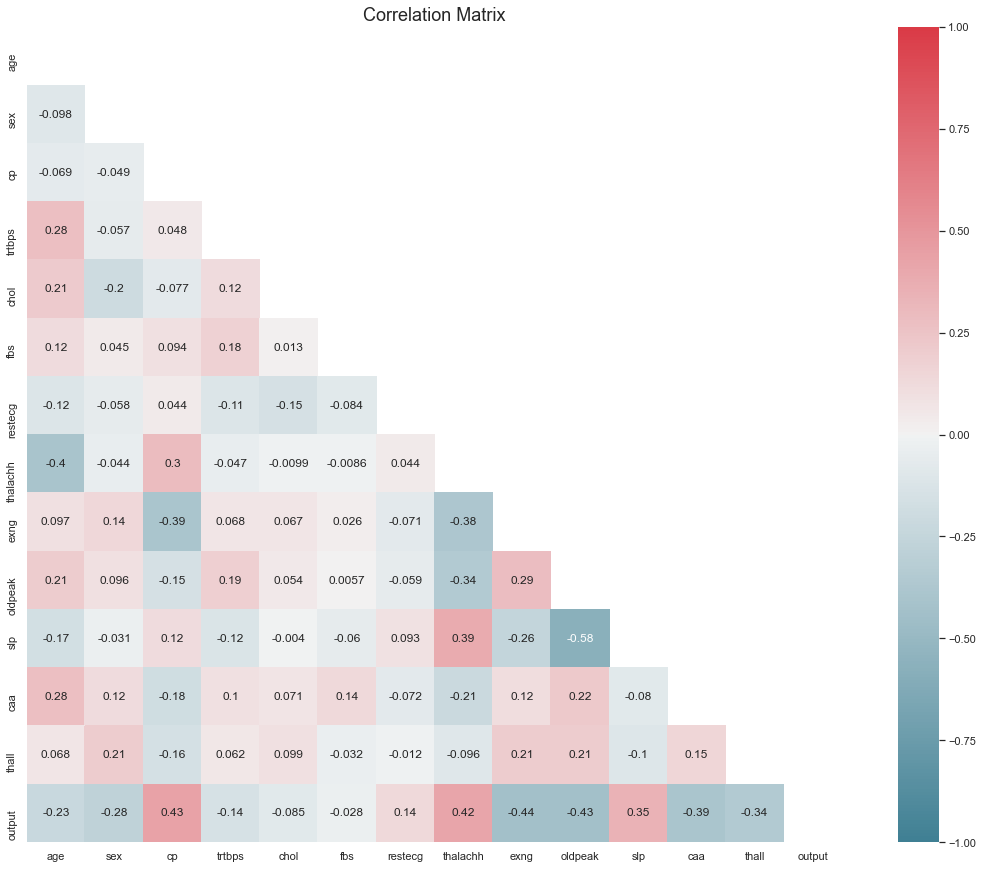

In [6]:
#Correlation matrix
sns.set(style="white")

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, annot=True)

plt.show()

According to correlation matrix every features have higher correlation then 0.1 with the target except fbs and chol

array([[<AxesSubplot:title={'center':'output'}>]], dtype=object)

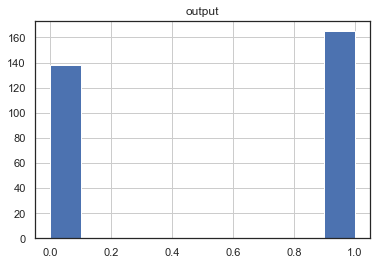

In [7]:
#Histogram
data.hist(column='output')

# Chest Pain

Firstly we wanted to check chest pain because of it has high correlation with our target and its values are integer encoded.

<AxesSubplot:xlabel='cp', ylabel='count'>

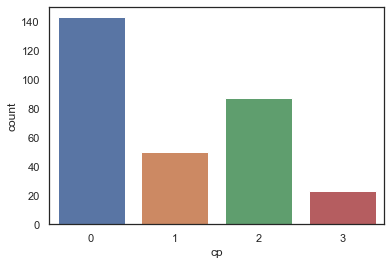

In [8]:
#counting values of chest pain
sns.countplot(data=data, x="cp")

<AxesSubplot:xlabel='cp', ylabel='output'>

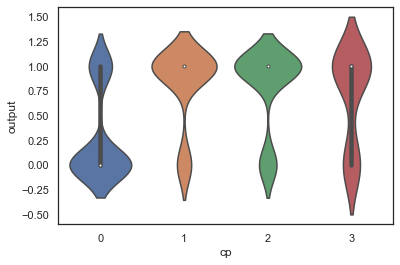

In [9]:
#Violin plot
sns.violinplot(x = 'cp', y = 'output', data = data)

In [10]:
#Taking heart attack chance percantages for every chest pain
cppercent0 = (100)*data[data['cp']==0]['output'].sum()/len(data[data['cp']==0]['output'])
cppercent1= (100)*data[data['cp']==1]['output'].sum()/len(data[data['cp']==1]['output'])
cppercent2= (100)*data[data['cp']==2]['output'].sum()/len(data[data['cp']==2]['output'])
cppercent3= (100)*data[data['cp']==3]['output'].sum()/len(data[data['cp']==3]['output'])

cppercentages=[cppercent0,cppercent1,cppercent2,cppercent3]

<BarContainer object of 4 artists>

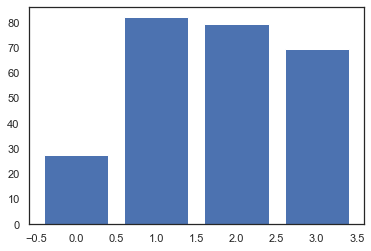

In [11]:
#showing percentage disturbituon of every value of cp in itself (for example percantage of output=1 in cp=2)
fig = plt.figure()
plt.bar([0,1,2,3],cppercentages)

According to graphs chest pain values does not show in order effect to the output so we decided to change integer encoding to one-hot encoding (dummies).

In [12]:
pd.get_dummies(data['cp'], prefix='cp')

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [13]:
#replacing integer encoding with real names
data['cp'] = data['cp'].replace(0,'typical')
data['cp'] = data['cp'].replace(1,'atypical')
data['cp'] = data['cp'].replace(2,'non-anginal')
data['cp'] = data['cp'].replace(3,'asymptomatic')

In [14]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,non-anginal,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,atypical,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,atypical,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,typical,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#getting dummies and adding them to the dataset
data = pd.concat([data,pd.get_dummies(data['cp'], prefix='cp')],axis=1)
#dropping old cp
data.drop(['cp'],axis=1, inplace=True)
#reordering features
data=data[['age','sex','cp_typical','cp_atypical','cp_non-anginal','cp_asymptomatic','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']]

In [16]:
data.head()

,age,sex,cp_typical,cp_atypical,cp_non-anginal,cp_asymptomatic,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,0,0,0,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,0,0,1,0,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,0,1,0,0,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,0,1,0,0,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,1,0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

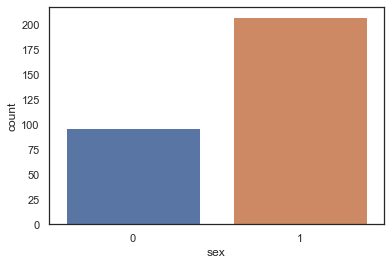

In [17]:
sns.countplot(data=data, x="sex")

<BarContainer object of 2 artists>

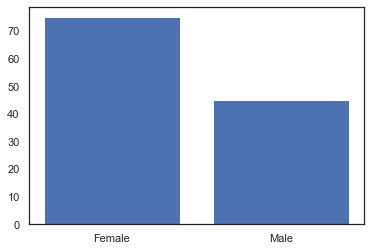

In [18]:
sexpercentf = (100)*data[data['sex']==0]['output'].sum()/len(data[data['sex']==0]['output'])
sexpercentm = (100)*data[data['sex']==1]['output'].sum()/len(data[data['sex']==1]['output'])
sexpercentages=[sexpercentf,sexpercentm]
fig = plt.figure()
plt.bar(['Female','Male'],sexpercentages)

# Thalachh

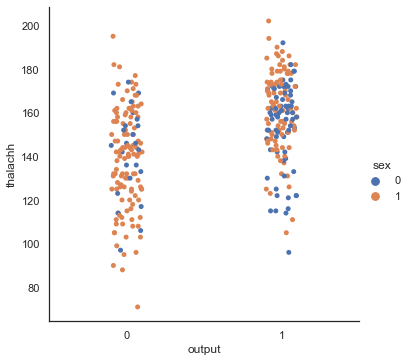

In [19]:
sns.catplot(x="output", y="thalachh", hue="sex", data=data)

<AxesSubplot:xlabel='output', ylabel='thalachh'>

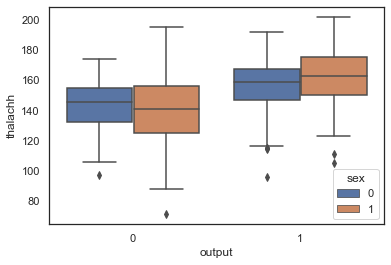

In [20]:
sns.boxplot(x="output", y="thalachh",hue='sex', data=data)

# Age

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

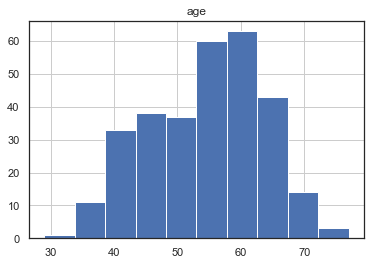

In [21]:
data.hist(column='age')

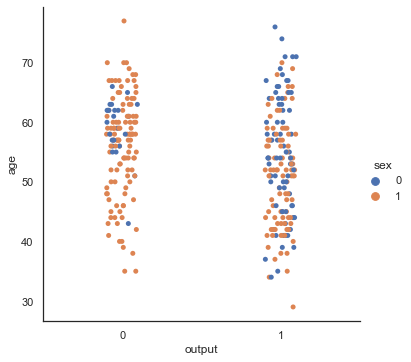

In [22]:
sns.catplot(x="output", y="age", hue="sex", data=data)

# restecg

<AxesSubplot:xlabel='restecg', ylabel='count'>

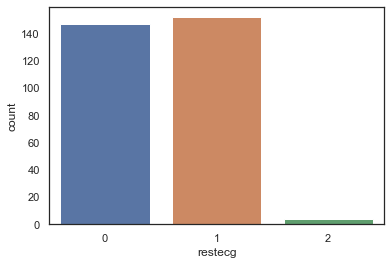

In [23]:
#counting values of restecg
sns.countplot(data=data, x="restecg")

<AxesSubplot:xlabel='restecg', ylabel='output'>

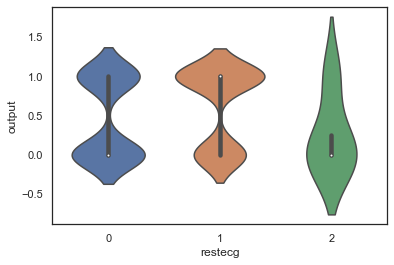

In [24]:
#Violin plot
sns.violinplot(x = 'restecg', y = 'output', data = data)

In [25]:
#Taking heart attack chance percantages for every restecg
restecgpercent0 = (100)*data[data['restecg']==0]['output'].sum()/len(data[data['restecg']==0]['output'])
restecgpercent1= (100)*data[data['restecg']==1]['output'].sum()/len(data[data['restecg']==1]['output'])
restecgpercent2= (100)*data[data['restecg']==2]['output'].sum()/len(data[data['restecg']==2]['output'])

restecgpercentages=[restecgpercent0,restecgpercent1,restecgpercent2]

<BarContainer object of 3 artists>

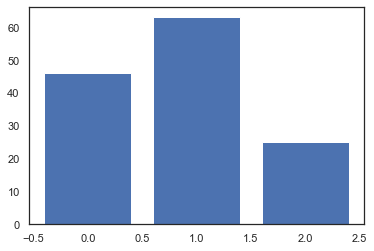

In [26]:
#showing percentage disturbituon of every value of restecg in itself (for example percantage of output=1 in cp=2)
fig = plt.figure()
plt.bar([0,1,2],restecgpercentages)

According to visualizations restecg values doesn't show any in order effect like chest pain feature so we decided to use dummies for this feature too.

In [27]:
#replacing integer encoding with real names
data['restecg'] = data['restecg'].replace(0,'normal')
data['restecg'] = data['restecg'].replace(1,'abnormaly')
data['restecg'] = data['restecg'].replace(2,'probable')

In [28]:
data.head()

,age,sex,cp_typical,cp_atypical,cp_non-anginal,cp_asymptomatic,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,0,0,0,1,145,233,1,normal,150,0,2.3,0,0,1,1
1,37,1,0,0,1,0,130,250,0,abnormaly,187,0,3.5,0,0,2,1
2,41,0,0,1,0,0,130,204,0,normal,172,0,1.4,2,0,2,1
3,56,1,0,1,0,0,120,236,0,abnormaly,178,0,0.8,2,0,2,1
4,57,0,1,0,0,0,120,354,0,abnormaly,163,1,0.6,2,0,2,1


In [29]:
#getting dummies and adding them to the dataset
data = pd.concat([data,pd.get_dummies(data['restecg'], prefix='restecg')],axis=1)
#dropping old cp
data.drop(['restecg'],axis=1, inplace=True)
#reordering features
data=data[['age','sex','cp_typical','cp_atypical','cp_non-anginal','cp_asymptomatic','trtbps','chol','fbs','restecg_normal','restecg_abnormaly','restecg_probable','thalachh','exng','oldpeak','slp','caa','thall','output']]

In [30]:
data.head()

,age,sex,cp_typical,cp_atypical,cp_non-anginal,cp_asymptomatic,trtbps,chol,fbs,restecg_normal,restecg_abnormaly,restecg_probable,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,0,0,0,1,145,233,1,1,0,0,150,0,2.3,0,0,1,1
1,37,1,0,0,1,0,130,250,0,0,1,0,187,0,3.5,0,0,2,1
2,41,0,0,1,0,0,130,204,0,1,0,0,172,0,1.4,2,0,2,1
3,56,1,0,1,0,0,120,236,0,0,1,0,178,0,0.8,2,0,2,1
4,57,0,1,0,0,0,120,354,0,0,1,0,163,1,0.6,2,0,2,1


In [31]:
data.shape

(303, 19)

# Models

We are going to predict output so its a binary classification target. The methods will we use are Logistic Regression, KNN and Decision Tree

In [32]:
#Taking values from data
M=data.values
X = M[:,0:18]
y = M[:,18]

In [33]:
X.shape

(303, 18)

In [34]:
y.shape

(303,)

In [35]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
# prepare the Kfold cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
x=[5,6,7,8,9,10,11,12,13]
for k in x:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print(knn.score(X_test, y_test))

0.6885245901639344
0.7213114754098361
0.7049180327868853
0.6885245901639344
0.6721311475409836
0.7049180327868853
0.7540983606557377
0.7377049180327869
0.7377049180327869


In [38]:
#Cross validation
knncross = KNeighborsClassifier(n_neighbors=11)
knnscores = cross_val_score(knncross, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(knnscores)

[0.67741935 0.61290323 0.58064516 0.73333333 0.63333333 0.73333333
 0.53333333 0.56666667 0.7        0.73333333]


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8688524590163934

In [40]:
#Cross validation
lrcross = LogisticRegression()
lrscores = cross_val_score(lrcross, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(lrscores)

[0.80645161 0.93548387 0.74193548 0.86666667 0.83333333 0.73333333
 0.76666667 0.83333333 0.8        0.83333333]


Our performance is upgraded with cross validation

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)

0.8360655737704918

In first experiment Logistic Regression gave the best result. Logistic Regression has advantages most of time in high correlated data its only disadvantage is its only usable in 2 class outputs but it is not a problem in our dataset. Decision tree has given second best result we believe decision tree is mostly superior model against knn but its a more complicated model due to knn. Decision trees result chances in its random state and mostly gives better results with more improved hyperparameters.

Now we try different hyperparameters, we try to use gridseach for decision tree

In [42]:
params={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
    
}

In [43]:
grid= GridSearchCV(dtree,
                  param_grid=params,
                  cv=10)
grid.fit(X_train,y_train)

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [  nan 0.661 0.661 ... 0.744 0.744 0.744]
  category=UserWarning


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [44]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [45]:
dtree2 = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth= 5,min_samples_leaf= 8,min_samples_split= 2)
dtree2.fit(X_train,y_train)
dtree2.score(X_test, y_test)

0.8524590163934426

With grid search performance of decision tree classifier improved

# Different Features

We choose to use features which has higher correlattion then 0.30

In [46]:
data2=data.copy()

In [47]:
data2=data2[['cp_typical','cp_atypical','cp_non-anginal','cp_asymptomatic','thalachh','exng','oldpeak','slp','caa','thall','output']]

In [48]:
data2.head()

,cp_typical,cp_atypical,cp_non-anginal,cp_asymptomatic,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,0,0,1,150,0,2.3,0,0,1,1
1,0,0,1,0,187,0,3.5,0,0,2,1
2,0,1,0,0,172,0,1.4,2,0,2,1
3,0,1,0,0,178,0,0.8,2,0,2,1
4,1,0,0,0,163,1,0.6,2,0,2,1


In [49]:
#Taking values from data
M2=data2.values
X2 = M2[:,0:10]
y2 = M2[:,10]

In [50]:
#Train Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# KNN

In [51]:
x=[5,6,7,8,9,10,11,12,13]
for k in x:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X2_train,y2_train)
    print(knn2.score(X2_test, y2_test))

0.7377049180327869
0.6885245901639344
0.7213114754098361
0.7377049180327869
0.7213114754098361
0.7868852459016393
0.7377049180327869
0.7704918032786885
0.7868852459016393


In [52]:
#Cross validation
knn2cross = KNeighborsClassifier(n_neighbors=10)
knn2scores = cross_val_score(knn2cross, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
print(knn2scores)

[0.80645161 0.74193548 0.61290323 0.7        0.7        0.73333333
 0.63333333 0.66666667 0.7        0.76666667]


# Logistic Regression

In [53]:
lr2 = LogisticRegression()
lr2.fit(X2_train,y2_train)
lr2.score(X2_test, y2_test)

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8688524590163934

In [54]:
#Cross validation
lr2cross = LogisticRegression()
lr2scores = cross_val_score(lr2cross, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
print(lr2scores)

[0.80645161 0.90322581 0.77419355 0.86666667 0.83333333 0.8
 0.8        0.83333333 0.86666667 0.83333333]


# Decision Tree

In [55]:
dtree3 = DecisionTreeClassifier(random_state=42)
dtree3.fit(X2_train,y2_train)
dtree3.score(X2_test, y2_test)

0.819672131147541

In [56]:
params={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
    
}

In [57]:
grid2= GridSearchCV(dtree,
                  param_grid=params,
                  cv=10)
grid2.fit(X2_train,y2_train)

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\_classes.py", line 240, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Est

C:\Users\burak\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [   nan 0.661  0.661  ... 0.8145 0.8145 0.8145]
  category=UserWarning


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [58]:
grid2.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [59]:
dtree4 = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth= 4,min_samples_leaf= 6,min_samples_split= 2)
dtree4.fit(X2_train,y2_train)
dtree4.score(X2_test, y2_test)

0.819672131147541

# Conclusion

Results of first features:

KNN(best):
0.7540983606557377

KNN_Cross(best):
0.73333333

Logistic Regression:
0.8688524590163934

Logistic Regression_Cross(best):
0.93548387

Decision Tree:
0.8360655737704918

Decision Tree(gridcv):
0.8524590163934426

Results of second features:

KNN(best):
0.7868852459016393

KNN_Cross(best):
0.80645161

Logistic Regression:
0.8688524590163934

Logistic Regression_Cross(best):
0.90322581

Decision Tree:
0.819672131147541

Decision Tree(gridcv):
0.819672131147541

According to our tests logistic regression with cross validation with first features shows best results and second best results with second features. Logistic Regression withot cross validation shows third and fourt best options. Its expected due to its very efficient when output is 2 class problem. Tests shows decision tree comes second in total after logistic regression. In first features decision tree gets better results with grid search but the results doesn't change with second features. KNN methods shows worst results between this 3 models. According to test changing features gives best effects with KNN. It shows with better feature chooses KNN can get better effects.